In [20]:
!unzip data_worthcheck.zip

Archive:  data_worthcheck.zip
replace data_worthcheck/labels.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data_worthcheck/labels.txt  
replace data_worthcheck/dev.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data_worthcheck/dev.csv  
replace data_worthcheck/check.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data_worthcheck/check.py  
replace data_worthcheck/train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data_worthcheck/train.csv  
replace data_worthcheck/test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data_worthcheck/test.csv  


In [21]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
import pickle
import time
import re

In [22]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [23]:
dev_set = pd.read_csv('data_worthcheck/dev.csv',encoding="latin1")
train_set = pd.read_csv('data_worthcheck/train.csv',encoding="latin1")
test_set = pd.read_csv('data_worthcheck/test.csv',encoding="latin1")

dev_set.head()

,text_a,label
0,jek dajal ga depok bang,no
1,detikcom untung depok masuk wilayah nya ridwan...,no
2,df dom jakarta depok yg gunain vc cabang nya c...,no
3,your2rl depok jkt,no
4,doakan indonesia selamat virus corona pkb depo...,yes


In [24]:
train_set.head()

,Unnamed: 0,text_a,label
0,0,betewe buka twitter cuman ngetweet liat home b...,no
1,1,mas piyuuu mugo2 corona tuh mulut tersumpal ma...,no
2,2,e100ss gini buka informasi sejelas nya identit...,yes
3,3,neng solo wes ono terduga corona cobo neng ati...,no
4,4,midiahn nii akun gak takut takut nya isu coron...,no


In [25]:
test_set.head()

,text_a,label
0,jek dajal ga depok bang,no
1,detikcom untung depok masuk wilayah nya ridwan...,no
2,df dom jakarta depok yg gunain vc cabang nya c...,no
3,your2rl depok jkt,no
4,doakan indonesia selamat virus corona pkb depo...,yes


In [26]:
cleanedDataTrain = []

lemma = WordNetLemmatizer()
swords = stopwords.words("indonesian")

def preprocessing(set, cleanedData):
  for text in set["text_a"]:
      
      # Cleaning links
      text = re.sub(r'http\S+', '', text)
      
      # Cleaning everything except alphabetical and numerical characters
      text = re.sub("[^a-zA-Z0-9]"," ",text)
      
      # Tokenizing and lemmatizing
      text = nltk.word_tokenize(text.lower())
      text = [lemma.lemmatize(word) for word in text]
      
      # Removing stopwords
      text = [word for word in text if word not in swords]
      
      # Joining
      text = " ".join(text)
      
      cleanedData.append(text)

preprocessing(train_set, cleanedDataTrain)

In [27]:
vectorizer = CountVectorizer()
x_train = vectorizer.fit_transform(cleanedDataTrain)
x_test = vectorizer.transform(test_set["text_a"])
y_train = np.asarray(train_set["label"])
y_test = np.asarray(test_set["label"])

In [62]:
from sklearn.svm import SVC
start_time = time.time()

model = SVC(gamma='scale')
model.fit(x_train,y_train)

end_time = time.time()
process_time = round(end_time-start_time,2)
print("Fitting SVC took {} seconds".format(process_time))

Fitting SVC took 114.66 seconds


In [63]:
predictions = model.predict(x_test)

Accuracy of model is 86.53571428571428%
Precision of model is 83.48591810494041%
Recall of model is 79.28573793834232%
F1 of model is 81.02435070508847%
Confusion Matrix:


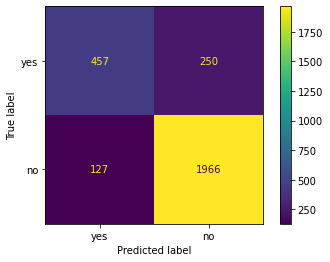

In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

print("Accuracy of model is {}%".format(accuracy_score(y_test,predictions) * 100))
print("Precision of model is {}%".format(precision_score(y_test, predictions, average="macro") * 100))
print("Recall of model is {}%".format(recall_score(y_test, predictions, average="macro") * 100))
print("F1 of model is {}%".format(f1_score(y_test, predictions, average="macro") * 100))
print("Confusion Matrix:")
cm = confusion_matrix(y_test, predictions, labels=["yes","no"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["yes","no"])
disp.plot()
plt.show()

In [58]:
from sklearn.svm import SVC
start_time = time.time()

model_2 = SVC(gamma='auto')
model_2.fit(x_train,y_train)

end_time = time.time()
process_time = round(end_time-start_time,2)
print("Fitting SVC took {} seconds".format(process_time))

Fitting SVC took 44.89 seconds


In [59]:
predictions_2 = model_2.predict(x_test)

Accuracy of model is 74.75%
Precision of model is 37.375%
Recall of model is 50.0%
F1 of model is 42.77539341917024%
Confusion Matrix:


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


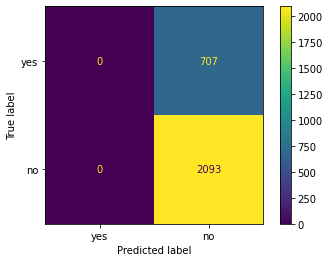

In [61]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

print("Accuracy of model is {}%".format(accuracy_score(y_test, predictions_2) * 100))
print("Precision of model is {}%".format(precision_score(y_test, predictions_2, average="macro") * 100))
print("Recall of model is {}%".format(recall_score(y_test, predictions_2, average="macro") * 100))
print("F1 of model is {}%".format(f1_score(y_test, predictions_2, average="macro") * 100))
print("Confusion Matrix:")
cm_2 = confusion_matrix(y_test, predictions_2, labels=["yes","no"])
disp_2 = ConfusionMatrixDisplay(confusion_matrix=cm_2, display_labels=["yes","no"])
disp_2.plot()
plt.show()